## Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import sparse
from surprise import Dataset, Reader, SVD
from collections import Counter

In [4]:
df = pd.read_csv("training_data/data.csv")
df.head()

,user_id,song_id,listen_count,timestamp,interaction,genres,hashtag
0,85,429,2,2024-02-13 18:37:23.159967,-1,"['Ambient', 'Rock', 'Metal', 'Reggae', 'Opera'...",#MusicMood
1,17,312,1,2024-08-07 14:11:23.159979,-1,"['Emo', 'Country', 'Dancehall', 'Trance', 'Reg...","#Dreamy,#TikTokViral"
2,15,247,0,2024-10-04 20:25:23.159984,2,"['Chillstep', 'Gospel', 'Emo', 'Acoustic', 'Gr...",NaN
3,11,25,0,2024-03-05 03:07:23.159987,-1,"['Ambient', 'Metal', 'Synthwave', 'Funk']","#InnerPeace,#ChillVibes,#HealingThroughMusic,#..."
4,65,160,0,2024-09-15 19:08:23.159991,2,"['Latin', 'World', 'Dubstep', 'Soul', 'Rock', ...","#Mood,#MusicToFeelTo,#Emotional,#StoryOfMyLife..."


## Data Analysis

### User Behaviour Analysis

Average number of listens per user: 44.31
Most active users: [60, 40, 55, 36, 46, 90, 23, 86, 84, 61] and Most Inactive Users: [96, 76, 88, 13, 62, 33, 81, 27, 44, 24]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, '49'),
  Text(1, 0, '0'),
  Text(2, 0, '15'),
  Text(3, 0, '74'),
  Text(4, 0, '97'),
  Text(5, 0, '20'),
  Text(6, 0, '53'),
  Text(7, 0, '57'),
  Text(8, 0, '28'),
  Text(9, 0, '86'),
  Text(10, 0, '88'),
  Text(11, 0, '21'),
  Text(12, 0, '25'),
  Text(13, 0, '80'),
  Text(14, 0, '89'),
  Text(15, 0, '7'),
  Text(16, 0, '51'),
  Text(17, 0, '41'),
  Text(18, 0, '77'),
  Text(19, 0, '96'),
  Text(20, 0, '48'),
  Text(21, 0, '78'),
  Text(22, 0, '87'),
  Text(23, 0, '59'),
  Text(24, 0, '63'),
  Text(25, 0, '94'),
  Text(26, 0, '33'),
  Text(27, 0, '64'),
  Text(28, 0, '30'),
  Text(29, 0, '24'),
  Text(30, 0, '62'),
  Text(31, 0, '2'),
  Text(32, 0, '27'),
  Text(33, 0, '10'),
  Text(3

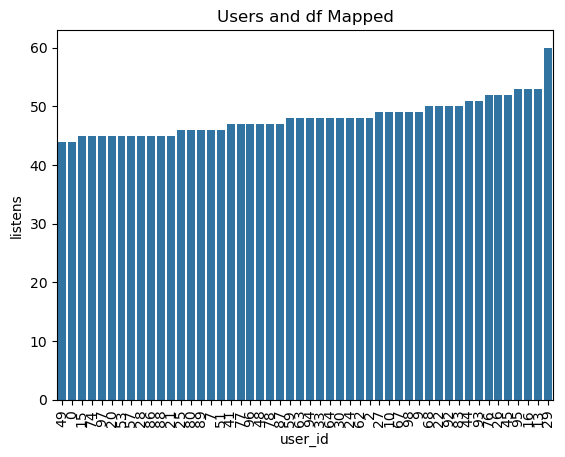

In [69]:
# users = Counter(sorted(df["user_id"]))
users = df["user_id"].value_counts()

# average listens per user
average_ratings_per_user = users.mean()
print("Average number of listens per user:",average_ratings_per_user)

# top 10 active/inactive users
listen_count_users = df.groupby("user_id")["listen_count"].sum()
sorted_users = listen_count_users.sort_values(ascending=True)
top_active_users = list(sorted_users.index[:10])
top_inactive_users = list(sorted_users.index[-10:])
print(f'Most active users: {top_active_users} and Most Inactive Users: {top_inactive_users}')

# plot user df
users_df = pd.DataFrame([users]).T.reset_index()[:50]
users_df.columns=["user_id","listens"]
sorted_df = users_df.sort_values(by="listens",ascending=True)
sorted_df
plt.title("Users and df Mapped")
sns.barplot(
    x='user_id',
    y='listens',
    data=sorted_df,
    order=sorted_df['user_id']
)
plt.xticks(rotation=90)


### Song Analysis

Number of unique songs: 389
Number of unlistened songs: 11
Most played songs: [422, 474, 350, 87, 34] and Least played songs: [45, 320, 334, 314, 281]


Text(0, 0.5, 'Number of Listens')

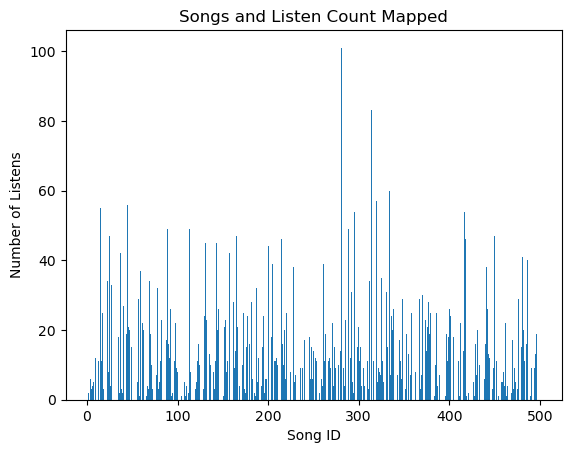

In [9]:
songs = df["song_id"]

# number of songs
unique_songs = songs.nunique()
print(f'Number of unique songs: {unique_songs}')

# check for unrated songs
all_songs = songs.unique()
listen_count = df.groupby("song_id")["listen_count"].sum()
listen_count = listen_count.reindex(all_songs, fill_value=0)
unplayed = (listen_count == 0).sum()
print(f'Number of unlistened songs: {unplayed}')

#top 5 most/least played songs
sorted_listen_count = listen_count.sort_values(ascending=True)
top_played_songs = list(sorted_listen_count.index[:5])
least_played_songs = list(sorted_listen_count.index[-5:])
print(f'Most played songs: {top_played_songs} and Least played songs: {least_played_songs}')


# plot listen counts
plt.title("Songs and Listen Count Mapped")
plt.bar(listen_count.index, listen_count.values)
plt.xlabel("Song ID")
plt.ylabel("Number of Listens")


### Genres

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, 'Metal'),
  Text(1, 0, 'Chillstep'),
  Text(2, 0, 'Trance'),
  Text(3, 0, 'Electronic'),
  Text(4, 0, 'Funk'),
  Text(5, 0, 'Opera'),
  Text(6, 0, 'Alternative'),
  Text(7, 0, 'DrumAndBass'),
  Text(8, 0, 'Classical'),
  Text(9, 0, 'Indie'),
  Text(10, 0, 'Disco'),
  Text(11, 0, 'Techno'),
  Text(12, 0, 'Ska'),
  Text(13, 0, 'Emo'),
  Text(14, 0, 'Grunge'),
  Text(15, 0, 'House'),
  Text(16, 0, 'Jazz'),
  Text(17, 0, 'Country'),
  Text(18, 0, 'Synthwave'),
  Text(19, 0, 'Blues'),
  Text(20, 0, 'EDM'),
  Text(21, 0, 'Afrobeats'),
  Text(22, 0, 'Reggae'),
  Text(23, 0, 'Punk'),
  Text(24, 0, 'Lo-fi'),
  Text(25, 0, 'Latin'),
  Text(26, 0, 'Dubstep'),
  Text(27, 0, 'Acoustic'),
  Text(28, 0, 'World'),
  Text(29, 0, 'R&B'),
  Text(30, 0, 'Rock'),
  T

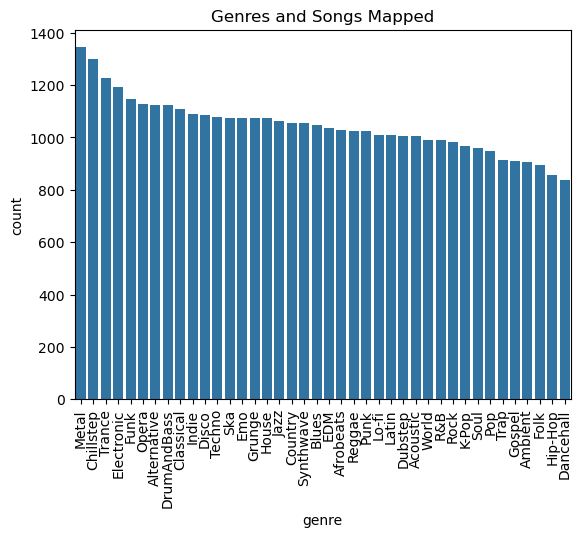

In [11]:
import ast 
from collections import Counter

genres = df["genres"].apply(ast.literal_eval)
genre_freq = Counter(genre for song in genres for genre in song)

genre_freq_df = pd.DataFrame([genre_freq]).T.reset_index()
genre_freq_df.columns = ['genre','count']

plt.title("Genres and Songs Mapped")
sns.barplot(x='genre',y='count', data=genre_freq_df.sort_values(by="count", ascending=False))
plt.xticks(rotation=90)

### Rating Patterns

Text(0, 0.5, 'Frequency')

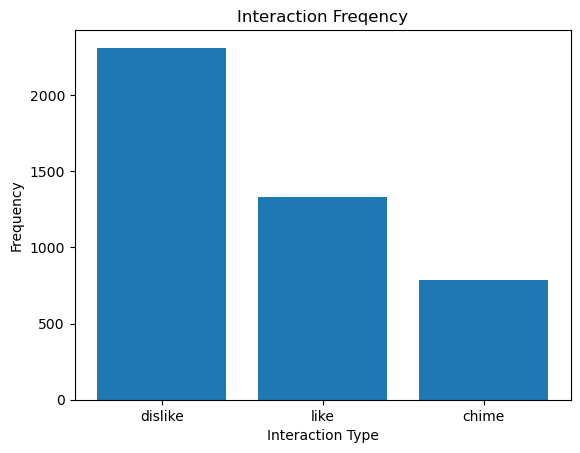

In [13]:
# ratings chart
ratings = df["interaction"].value_counts()
interaction_type = ["dislike","like","chime"]
plt.title("Interaction Freqency")
plt.bar(interaction_type, ratings.values)
plt.xlabel("Interaction Type")
plt.ylabel("Frequency")

### Matrix Sparsity

In [15]:
user_item_matrix = df.pivot(
    index='user_id',
    columns='song_id',
    values='interaction'
)

# handling empty values
user_item_matrix = user_item_matrix.fillna(0)
sparsity = 1.0 - np.count_nonzero(user_item_matrix) / user_item_matrix.size
print(f"Matrix sparsity: {sparsity:.2%}")


Matrix sparsity: 88.61%


## Data Preprocessing

In [17]:
from scipy.sparse import csr_matrix
# compressed sparse row

sparse_matrix = csr_matrix(user_item_matrix.values)
sparse_matrix.shape

# 3 methods to explore: time-based splitting, leave-one-out, random splitting with user stratification

(100, 389)

### Time-based splitting

In [19]:
df_sorted  = df.sort_values("timestamp")

# determine split point (we'll be doing 80/20 split testing)
split_idx = int(len(df_sorted)*0.8)

df_train = df_sorted.iloc[:split_idx] #training set
df_test = df_sorted.iloc[split_idx:] #testing set

#check for users and songs in test that aren't in training
#can't make good predictions for completely new users/songs
all_users = sorted(set(df["user_id"]))
all_songs = sorted(set(df["song_id"]))

#training matrix
train_matrix = df_train.pivot(
    index="user_id",
    columns="song_id",
    values="interaction"
).fillna(0)

train_matrix = train_matrix.reindex(index=all_users, columns=all_songs,fill_value=0)
train_sparse = csr_matrix(train_matrix.values)

#testing matrix
test_matrix = df_test.pivot(
    index="user_id",
    columns="song_id",
    values="interaction"
).fillna(0)
test_matrix = test_matrix.reindex(index=all_users, columns=all_songs,fill_value=0)
test_sparse = csr_matrix(test_matrix.values)

#reindex used to ensure both test and train matrices have the same dimensions (size should be # of user-song combinations)
#check size
print(f'Size of Train matrix: {train_matrix.shape}    Size of Test matrix: {test_matrix.shape}')

Size of Train matrix: (100, 389)    Size of Test matrix: (100, 389)


### Leave-one-out method

In [21]:
# random interacton set
# returns a groupby object, takes one sample entry per user
test_rn_interactions = df.groupby("user_id").sample(n=1)
#train set
train_rn_interactions = df.drop(test_rn_interactions.index)

# latest interaction set
test_new_interactions = df.sort_values("timestamp").groupby("user_id").tail(1)
train_new_interactions = df.drop(test_new_interactions.index)


### Random Splits with User Stratification

In [23]:
from sklearn.model_selection import train_test_split

# number of interactions per user
interaction_count = df.groupby("user_id").size() #groups number of interactions by user, index is id and value is # of interactions
stratification_labels = ["low","medium","high"]
bins = pd.qcut(interaction_count, q=3, labels=stratification_labels) #divides series into equal sized bins
# result: series, index is id, value is label

user_bins = interaction_count.map(bins)

unique_users = interaction_count.index

x_train, x_test = train_test_split(unique_users,test_size=0.2,stratify=user_bins)

## Training with SVD

In [25]:
from surprise import SVD,Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split

data_for_surprise = df[['user_id', 'song_id', 'interaction']]

#reader parses the interaction values range
reader = Reader(rating_scale=(-1,2))

#converts panda df into surprise compatible dataset
data = Dataset.load_from_df(
    data_for_surprise, 
    reader)

trainset, testset = train_test_split(data,test_size=0.2)

model=SVD(
    n_factors = 50, # number of features/dimensions for the users/items
    n_epochs=50, # number of iterations
    lr_all=0.005, # learning rate
    reg_all=0.02 # regularization parameter
)
model.fit(trainset)

'''
note: fit() method requires s training set format created by surprise library, hence the additional processing
'''

'\nnote: fit() method requires s training set format created by surprise library, hence the additional processing\n'

### String Matching

In [27]:
# from fuzzywuzzy import process

# def song_finder(title):
    



## Testing

In [29]:
# from surprise import accuracy
# from sklearn.metrics import classification_report


# predictions = model.test(testset)
# for pred in predictions[:5]:
#     print(pred)
# accuracy.rmse(predictions)
# accuracy.mae(predictions)

# def discretize_prediction(pred):
#     if pred < 0: return -1
#     elif pred < 1.5: return 1
#     else: return 2

# actual = [pred.r_ui for pred in predictions]
# predicted = [discretize_prediction(pred.est) for pred in predictions]

# # Classification metrics
# print(classification_report(actual, predicted, target_names=["Dislike (-1)", "Like (1)", "Superlike (2)"]))
# #r_ui = actual rating, est = predicted rating